<a href="https://colab.research.google.com/github/aiejf/RAG-Agent/blob/main/evaluate_rag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph
!pip install opik
!pip install fastembed langchain-qdrant
!pip install langchain-google-genai
!pip install langchain-sambanova
!pip install langchain langchain-community
!pip install ragas
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.5/152.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.7/684.7 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.8/69.8 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 89.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 786.8/786.8 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.4

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.4
    Uninstalling requests-2.32.4:
      Successfully uninstalled requests-2.32.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.
google-generativeai 0.8.5 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.18 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 277.3/277.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━

## Get your API key:

- [OPIK API KEY](https://www.comet.com/signup?utm_source=workshop&utm_medium=partner&utm_campaign=tarun)
- [Google API Key](https://aistudio.google.com/apikey)

In [3]:
import os
from google.colab import userdata

os.environ["OPIK_API_KEY"] = userdata.get("OPIK_API_KEY")
os.environ["OPIK_WORKSPACE"] = "jean-fran-ois-a"
os.environ['OPIK_PROJECT_NAME'] = "eval"
os.environ['GOOGLE_API_KEY'] = userdata.get("GOOGLE_API_KEY")
os.environ['SAMBANOVA_API_KEY'] = userdata.get("SAMBANOVA_API_KEY")

## Download the document

In [4]:
data_path="policy.pdf"
pdf_url="https://www.undp.org/sites/g/files/zskgke326/files/migration/al/IT-Policies-and-Procedures-Manual.pdf"

In [5]:
!wget --user-agent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36" -O "$data_path" "$pdf_url"

--2025-09-01 18:34:03--  https://www.undp.org/sites/g/files/zskgke326/files/migration/al/IT-Policies-and-Procedures-Manual.pdf
Resolving www.undp.org (www.undp.org)... 23.56.4.73, 23.56.4.9
Connecting to www.undp.org (www.undp.org)|23.56.4.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 748042 (731K) [application/pdf]
Saving to: ‘policy.pdf’

policy.pdf          100%[===================>] 730.51K  --.-KB/s    in 0.1s    

2025-09-01 18:34:03 (6.11 MB/s) - ‘policy.pdf’ saved [748042/748042]



In [10]:
from langchain_community.document_loaders.pdf import PDFPlumberLoader #read pdf
from langchain_text_splitters import RecursiveCharacterTextSplitter #chunck data based on token
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings #embedding

#three advantages of using fastembedding
"""
1-onnx runtime which will load your model faster than other open sources
2-data parallelism
3-sparse (bm25 or minicoil) and dense vectors (bge models, jina embedding)
"""

' \n2-data parallelism\n'

In [7]:
loader = PDFPlumberLoader(data_path)
data = loader.load()

In [8]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=2000, chunk_overlap=0)
chunks = text_splitter.split_documents(data)

In [9]:
len(chunks)

37

In [11]:
from langchain_qdrant import FastEmbedSparse, QdrantVectorStore, RetrievalMode # hybrid
from qdrant_client import QdrantClient, models
from qdrant_client.http.models import Distance, SparseVectorParams, VectorParams

In [12]:
sparse_embeddings = FastEmbedSparse(model_name="Qdrant/minicoil-v1")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

minicoil.triplet.model.npy:   0%|          | 0.00/157M [00:00<?, ?B/s]

onnx/model.onnx:   0%|          | 0.00/130M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/367 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

stopwords.txt:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

minicoil.triplet.model.vocab: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [13]:
embeddings = FastEmbedEmbeddings(model_name="thenlper/gte-large")

/usr/local/lib/python3.12/dist-packages/langchain_community/embeddings/fastembed.py:109: UserWarning: The model thenlper/gte-large now uses mean pooling instead of CLS embedding. In order to preserve the previous behaviour, consider either pinning fastembed version to 0.5.1 or using `add_custom_model` functionality.
  values["model"] = fastembed.TextEmbedding(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model.onnx:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/695 [00:00<?, ?B/s]

## Vector store: Qdrant

- RetrievalMode: Hybrid,

Dense (Vector based search) or Sparse (Keyword based search)

In [14]:
api_key = userdata.get("QDRANT_API_KEY")
endpoint_url = userdata.get("QDRANT_URL")

SecretNotFoundError: Secret QDRANT_API_KEY does not exist.

In [17]:
!ls /tmp/
# !mkdir /tmp/evalapp

colab_runtime.sock
dap_multiplexer.e61c3be6a014.root.log.INFO.20250901-182441.83
dap_multiplexer.INFO
debugger_hole0ecj3
evalapp
fastembed_cache
initgoogle_syslog_dir.0
language_service.e61c3be6a014.root.log.ERROR.20250901-183559.719
language_service.e61c3be6a014.root.log.INFO.20250901-182456.169
language_service.e61c3be6a014.root.log.INFO.20250901-182635.658
language_service.e61c3be6a014.root.log.INFO.20250901-182646.719
language_service.e61c3be6a014.root.log.WARNING.20250901-183559.719
language_service.ERROR
language_service.INFO
language_service.WARNING
pyright-176-xqbFmkWZVED1
pyright-664-DJUnvogA1eKN
pyright-725-nKLivzOTFHsm
pyright-725-TPiZUFVBtBnU
python-languageserver-cancellation


In [18]:
# client = QdrantClient(api_key=api_key,
#                       url=endpoint_url)

client = QdrantClient(path="/tmp/evalapp")

In [19]:
collection_name = "initialv1"

In [20]:
#create space to save the data
client.create_collection(
    collection_name=collection_name,
    vectors_config={"dense": VectorParams(size=1024, distance=Distance.COSINE,on_disk=True)},
    sparse_vectors_config={
        "sparse": SparseVectorParams(index=models.SparseIndexParams(on_disk=True))
    },
)

True

In [21]:
qdrant = QdrantVectorStore(
    client=client,
    collection_name=collection_name,
    embedding=embeddings, # dense embeddings
    sparse_embedding=sparse_embeddings, # sparse embeddings
    retrieval_mode=RetrievalMode.HYBRID,
    vector_name="dense",
    sparse_vector_name="sparse",
)

In [22]:
#generate a ID for each chunck
from uuid import uuid4
uuids = [str(uuid4()) for _ in range(len(chunks))]

In [23]:
len(uuids)

37

In [24]:
len(chunks)

37

In [25]:
qdrant.add_documents(documents=chunks,ids=uuids)

['7e0581c5-373c-4427-a249-e4e62c3be206',
 '684ed49f-14fe-4261-ac40-4fc46dd70aea',
 'cb450fde-f3e5-41a9-9536-06c78c7cb9d3',
 'bb13a56c-f40d-4a10-9ddc-87810bf4c72a',
 '25fa3f1a-8073-4b89-ba3d-df11198d775a',
 '78ceb990-769f-42dd-b2bc-03b81db1cf81',
 'eeaad16d-8755-4dbc-80bf-ba9aa3b76edd',
 'cad6f30a-2a05-469e-ade9-4625c91eb7a4',
 '8a5b8d14-5b31-4a38-b42c-903add18efcc',
 '4e6abeed-4b59-44f2-89f1-f672fdeb6333',
 '04fb0d19-80dc-4290-9323-dec11931690a',
 'a6a33049-1807-4871-9fd6-68590284b3a7',
 'b4d24d1d-5665-4855-8e07-cb5feb47d730',
 'dd53fe47-0472-4590-a28e-4e803f04a1c8',
 'b3ac7399-9d88-4f25-8012-81494c52c998',
 '7ad35bc6-97a6-4095-9bad-7452fe9ae531',
 'd93e6441-0694-4f92-8a1f-9596b21e2b02',
 'fc55d89f-a2e4-4509-9c80-c5593b68c2ef',
 'd6246703-dec8-4662-ab92-ecaa608c5fd9',
 'b6dd8657-5065-4089-a39e-659fd6be2bfc',
 'fe7da495-033c-4600-b1ae-efa29f375e25',
 '4f52ff6e-a9e7-443a-96f7-d581fdfadbd6',
 'df7ac5fe-fed0-45a7-80af-2fe5acfdd9cc',
 '02d0c2cb-4385-4eeb-aaf9-723c2459fd99',
 'a0054a65-6e5c-

In [26]:
#check where data is saved
!ls /tmp/evalapp/collection/

initialv1


In [29]:
#try to retrieve some relevant info (k=4 by default)
# qdrant.similarity_search("what is a breach of policy?") #will retrieve top 4
# len(qdrant.similarity_search("what is a breach of policy?"))
qdrant.max_marginal_relevance_search("what is a breach of policy?")

[Document(metadata={'source': 'policy.pdf', 'file_path': 'policy.pdf', 'page': 15, 'total_pages': 33, 'Title': 'IT Policies and Procedures Manual Template', 'Author': 'Business Victoria (www.business.vic.gov.au)', 'Subject': 'IT Policies and Procedures Manual Template', 'Creator': 'Microsoft® Word 2010', 'CreationDate': "D:20160513175204+02'00'", 'ModDate': "D:20160513175204+02'00'", 'Producer': 'Microsoft® Word 2010', '_id': 'd6246703-dec8-4662-ab92-ecaa608c5fd9', '_collection_name': 'initialv1'}, page_content='IT Policy and Procedure Manual\nBreach of Policy\nWhere there is a breach of this policy by an employee, that employee will be referred to {insert\nrelevant job title here} for {insert consequence here, such as further consultation, reprimand\naction etc.}\nWhere an employee is aware of a breach of the use of software in accordance with this policy,\nthey are obliged to notify {insert relevant job title here} immediately. In the event that the breach\nis not reported and it is 

##RAG
-Retrieval: Qdrant - mmr or similarity search to get the context
-Augmentation: system prompt and instructions
-Generation: your lLM

##Best practices to define a system prompt:
-role play: you are a expert coder
-instructions
-motivation (negative sentiment)

In [34]:
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_sambanova import ChatSambaNovaCloud

In [35]:
llm = ChatSambaNovaCloud(
    model="Llama-4-Maverick-17B-128E-Instruct",
    max_tokens=1024,
    temperature=0,
    top_p=0.01,
)
# llm = ChatSambaNovaCloud(
#     model="gemini-2.5-flash",
#     max_tokens=1024,
#     temperature=0,
#     top_p=0.01,
# )

In [36]:
eval_llm = ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0,
    max_tokens=None)

In [37]:
del chunks

In [38]:
import gc
gc.collect()

90

## Generate dataset

In [39]:
from ragas.testset import TestsetGenerator
from ragas.llms import LangchainLLMWrapper
from ragas.embeddings import LangchainEmbeddingsWrapper

In [40]:
evaluator_llm = LangchainLLMWrapper(eval_llm)
evaluator_embeddings = LangchainEmbeddingsWrapper(embeddings)

In [99]:
generator = TestsetGenerator(llm=evaluator_llm, embedding_model=evaluator_embeddings)
dataset = generator.generate_with_langchain_docs(data, testset_size=15)

In [100]:
dataset.to_pandas()

,user_input,reference_contexts,reference,synthesizer_name
0,"What manual is for Information Technology, I n...",[Information Technology Policy and Procedure\n...,The Information Technology Policy and Procedur...,single_hop_specifc_query_synthesizer
1,What steps for complete this IT Policy and Pro...,[IT Policy and Procedure Manual\nHow to comple...,To complete the template for an IT Policy and ...,single_hop_specifc_query_synthesizer
2,How to make IT Policy and Procedure Manual a l...,[IT Policy and Procedure Manual\n5. Once you h...,To make the IT Policy and Procedure Manual a l...,single_hop_specifc_query_synthesizer
3,Where can I find the Electonic Transactions Po...,[Information Technology\nPolicy and Procedure ...,The Electronic Transactions Policy is located ...,single_hop_specifc_query_synthesizer
4,"As Lena Petrova, overseeing IT and financial p...",[IT Policy and Procedure Manual\nProcedures......,The section for Emergency Management of Inform...,single_hop_specifc_query_synthesizer
5,Considering the institution's commitment to `E...,[<1-hop>\n\nIT Policy and Procedure Manual\nEm...,Regarding `data privacy` for information colle...,multi_hop_abstract_query_synthesizer
6,According to the IT Policy and Procedure Manua...,[<1-hop>\n\nIT Policy and Procedure Manual\n ...,The IT Policy and Procedure Manual provides po...,multi_hop_abstract_query_synthesizer
7,"Lena Petrova, I need to know about the IT Poli...",[<1-hop>\n\nIT Policy and Procedure Manual\nAl...,The IT Policy and Procedures for mobile device...,multi_hop_abstract_query_synthesizer
8,How does IT audting help with informashun tech...,[<1-hop>\n\nIT Policy and Procedure Manual\n ...,A technology audit is conducted to ensure that...,multi_hop_abstract_query_synthesizer
9,How to ensure staff compliance with the Bring ...,[<1-hop>\n\nIT Policy and Procedure Manual\n5....,To ensure staff compliance with the Bring Your...,multi_hop_abstract_query_synthesizer


In [44]:
len(dataset.to_pandas().iloc[0].reference_contexts)

1

## Precision

In [45]:
sample_question = dataset.to_pandas().iloc[1].user_input

In [46]:
sample_question

'What steps for complete this IT Policy and Procedure Manual template?'

In [47]:
sample_context = dataset.to_pandas().iloc[1].reference_contexts

In [48]:
sample_context

["IT Policy and Procedure Manual\nHow to complete this template\nDesigned to be customized\nThis template for an IT policy and procedures manual is made up of example topics. You\ncan customize these if you wish, for example, by adding or removing topics.\nTo complete the template:\n1. Guidance text appears throughout the document, marked by the word Guidance.\nWhere you see a guidance note, read and then delete it. Guidance has been added\nto help you complete the template and should not appear in your final version.\n2. Using Word's Replace function, search for {Municipality Name} and replace with\nyour company name.\na) In Word's Home ribbon, open the Find and Replace tool, choose\nReplace to open the Find and Replace tool. The Find and Replace\ndialog opens with the Replace tab selected.\nb) Enter {Municipality Name} in the Find what field.\nc) Enter your company name in the Replace with field.\nd) Click Replace All\n3. Replace {items in curly brackets} with your own wording.\n4. W

In [49]:
relevant_docs = qdrant.max_marginal_relevance_search(sample_question)

In [50]:
relevant_docs

[Document(metadata={'source': 'policy.pdf', 'file_path': 'policy.pdf', 'page': 1, 'total_pages': 33, 'Title': 'IT Policies and Procedures Manual Template', 'Author': 'Business Victoria (www.business.vic.gov.au)', 'Subject': 'IT Policies and Procedures Manual Template', 'Creator': 'Microsoft® Word 2010', 'CreationDate': "D:20160513175204+02'00'", 'ModDate': "D:20160513175204+02'00'", 'Producer': 'Microsoft® Word 2010', '_id': '684ed49f-14fe-4261-ac40-4fc46dd70aea', '_collection_name': 'initialv1'}, page_content="IT Policy and Procedure Manual\nHow to complete this template\nDesigned to be customized\nThis template for an IT policy and procedures manual is made up of example topics. You\ncan customize these if you wish, for example, by adding or removing topics.\nTo complete the template:\n1. Guidance text appears throughout the document, marked by the word Guidance.\nWhere you see a guidance note, read and then delete it. Guidance has been added\nto help you complete the template and sh

In [51]:
retrieved_context = [relevant_docs[0].page_content]

In [52]:
from ragas.metrics import context_precision
context_precision.llm = evaluator_llm
context_precision._required_columns

{<MetricType.SINGLE_TURN: 'single_turn'>: {'reference',
  'retrieved_contexts',
  'user_input'}}

In [53]:
from ragas import SingleTurnSample
from ragas.metrics import NonLLMContextPrecisionWithReference

context_precision = NonLLMContextPrecisionWithReference()

In [54]:
sample = SingleTurnSample(
    retrieved_contexts=retrieved_context,
    reference_contexts=sample_context
)

await context_precision.single_turn_ascore(sample)

0.9999999999

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def evaluate_retriever(reference_contexts, retrieved_context, method='tfidf', threshold=0.7):
    """
    Evaluate retriever using precision@1 and recall@1

    Args:
        reference_contexts: List of ground truth relevant contexts
        retrieved_context: Single retrieved context (string)
        method: 'exact' or 'tfidf'
        threshold: Similarity threshold for relevance (only for tfidf)

    Returns:
        tuple: (precision_at_1, recall_at_1)
    """

    if method == 'exact':
        # Exact string matching
        is_relevant = any(ref.strip() == retrieved_context.strip() for ref in reference_contexts)

    elif method == 'tfidf':
        # TF-IDF cosine similarity
        all_texts = reference_contexts + [retrieved_context]
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(all_texts)

        ref_vectors = tfidf_matrix[:len(reference_contexts)]
        ret_vector = tfidf_matrix[-1]

        max_sim = cosine_similarity(ret_vector, ref_vectors).max()
        is_relevant = max_sim >= threshold

    else:
        raise ValueError("Method must be 'exact' or 'tfidf'")

    precision_at_1 = 1.0 if is_relevant else 0.0
    recall_at_1 = 1.0 if is_relevant else 0.0

    return precision_at_1, recall_at_1

In [56]:
evaluate_retriever(
    reference_contexts = sample_context,
    retrieved_contexts = retrieved_context,
    method = 'exact',
    threshold = 0.7,
    k = 3
)

TypeError: evaluate_retriever() got an unexpected keyword argument 'retrieved_contexts'

## RAG

- Retrieval: Qdrant- mmr or similarity search to get the context
- Augmentation: System prompt and instructions
- Generation: gemini-2.5-flash

# best practices to define a system prompt:
- role play
- instructions
- motivation (negative sentiment)


In [30]:
from langgraph.graph import START, StateGraph,END

from langchain_core.documents import Document
from typing_extensions import List, TypedDict, Annotated

In [31]:
from opik.integrations.langchain import OpikTracer

In [32]:
SYSTEM_TEMPLATE = """
You are an expert QA Assistant who answers questions using only the provided context as your source of information.
If the question is not from the provided context, say `I don't know. Not enough information received.`
If the task is not performed, then you are fired.
"""

HUMAN_TEMPLATE = """
We have provided context information below.

CONTEXT: {context_str}
---------------------
Given this information, please answer the question: {query}
---------------------
If the question is not from the provided context, say `I don't know. Not enough information received.`
"""

In [33]:
class State(TypedDict):
    question: str
    context: List[Document]
    answer: str
    context_relevance: str
    answer_relevance: str

## 4 nodes
- search: context
- generate: generating the final response
- context relevance: context, question, answer: eval- LLM as a Judge (True/False)
- answer relvance: : context, question, answer: eval- LLM as a Judge (True/False)

In [57]:
def search(state: State):
    retrieved_docs = qdrant.similarity_search(state["question"])
    return {"context": retrieved_docs}

In [58]:
context = qdrant.similarity_search("what is blackhole?")

In [59]:
context[0].page_content

'The illegal duplication of software or other copyrighted works is not condoned within this\ninstitution and {insert relevant job title here} is authorised to undertake disciplinary action where\nsuch event occurs.\nPage 12 of 30'

## Before RAG

In [60]:
llm.invoke("what is blackhole?")

AIMessage(content="A black hole is a region in space where the gravitational pull is so strong that nothing, including light, can escape. It is formed when a massive star collapses in on itself and its gravity becomes so strong that it warps the fabric of spacetime around it.\n\nHere's a simplified explanation:\n\n1. **Massive star collapse**: A massive star (at least 3-4 times larger than the sun) runs out of fuel and dies.\n2. **Supernova explosion**: The star undergoes a massive explosion, expelling a large amount of matter into space.\n3. **Core collapse**: The star's core collapses under its own gravity, causing a massive amount of matter to be compressed into an incredibly small space.\n4. **Singularity**: The core collapses into a singularity, a point of infinite density and zero volume, where the laws of physics as we know them break down.\n5. **Event Horizon**: The point of no return around the singularity is called the event horizon. Any matter or radiation that crosses the e

In [61]:
def generate(state: State):
    # first retrieve the relevant context
    # document format: extract the string
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])

    messages = [
        {"role": "system", "content": SYSTEM_TEMPLATE},
        {"role": "user", "content": HUMAN_TEMPLATE.format(context_str=docs_content, query=state["question"])},
    ]

    response = llm.invoke(messages)
    return {"answer": response.content}

In [62]:
def get_context_relevance(state: State):
  instuctions = """You are a teacher grading a quiz.
  You will be given a QUESTION and a set of FACTS provided by the student.

  Here is the grade criteria to follow:

  <criteria>
  (1) You goal is to identify FACTS that are completely unrelated to the QUESTION
  (2) If the facts contain ANY keywords or semantic meaning related to the question, consider them relevant
  (3) It is OK if the facts have SOME information that is unrelated to the question as long as (2) is met
  </criteria>

  <instructions>
  Relevance:
  A relevance value of True means that the FACTS contain ANY keywords or semantic meaning related to the QUESTION and are therefore relevant.
  A relevance value of False means that the FACTS are completely unrelated to the QUESTION.
  Explain your reasoning in a step-by-step manner to ensure your reasoning and conclusion are correct.
  Avoid simply stating the correct answer at the outset.
  </instructions>
  """

  relevant_document = "\n\n".join(doc.page_content for doc in state["context"])

  # Context relevance (C|Q)
  eval_setup = f"FACTS: {relevant_document}\nQUESTION: {state['question']}"

  prompt = [
        {"role": "system", "content": instuctions},
        {"role": "user", "content": eval_setup},
    ]
  grade = llm.invoke(prompt)

  return {"context_relevance": grade.content}

In [63]:
def get_answer_relevance(state: State):
  instuctions = """You are a teacher grading a quiz.
    You will be given a QUESTION and a STUDENT ANSWER.

    <criteria>
    Here is the grade criteria to follow:
    (1) Ensure the STUDENT ANSWER is concise and relevant to the QUESTION
    (2) Ensure the STUDENT ANSWER helps to answer the QUESTION
    </criteria>

    <instructions>
    Relevance:
    A relevance value of True means that the student's answer meets all of the criteria.
    A relevance value of False means that the student's answer does not meet all of the criteria.
    Explain your reasoning in a step-by-step manner to ensure your reasoning and conclusion are correct.
    Avoid simply stating the correct answer at the outset.
    </instructions>
  """

  # Answer relevance (A|Q)
  eval_setup = f"QUESTION: {state['question']}\nSTUDENT ANSWER: {state['answer']}"
  prompt = [
        {"role": "system", "content": instuctions},
        {"role": "user", "content": eval_setup},
    ]
  grade = llm.invoke(prompt)

  return {"answer_relevance": grade.content}

## 4 nodes: search generate context relevant and answer relevance


1 First: Search
2. Second: Generate
3. Parallel Node: COntext relevance and answer relevance

In [64]:
def route_to_parallel(state):
    return ["get_context_relevance", "get_answer_relevance"]

In [65]:
def join_nodes(state: State):
  return state

In [66]:
graph_builder = StateGraph(State)
graph_builder.add_node("search", search)
graph_builder.add_node("generate", generate)

graph_builder.add_node("get_context_relevance", get_context_relevance)
graph_builder.add_node("get_answer_relevance", get_answer_relevance)
graph_builder.add_node("join_node", join_nodes)

graph_builder.add_edge(START, "search")
graph_builder.add_edge("search", "generate")
graph_builder.add_conditional_edges(
    "generate",
    route_to_parallel,
    {
    "get_context_relevance": "get_context_relevance",
    "get_answer_relevance": "get_answer_relevance"
    }
)
graph_builder.add_edge("get_context_relevance", "join_node")
graph_builder.add_edge("get_answer_relevance", "join_node")
graph_builder.add_edge("join_node", END)

In [67]:
graph = graph_builder.compile()

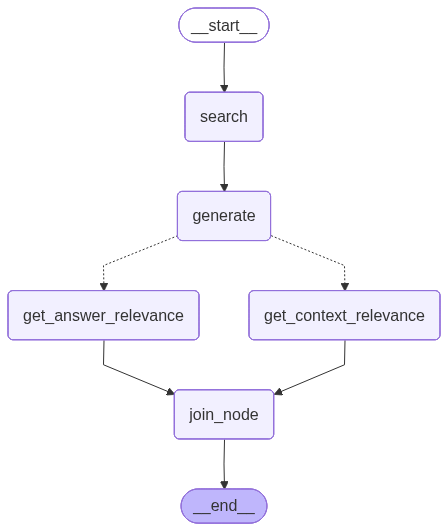

In [68]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

## Run the user query and track the evals on OPIK

In [69]:
opik_tracer = OpikTracer(graph=graph.get_graph(xray=True))

In [70]:
response = graph.invoke({"question": "What happens when I receive an order?"},config={"callbacks": [opik_tracer]})

OPIK: Started logging traces to the "eval" project at https://www.comet.com/opik/api/v1/session/redirect/projects/?trace_id=0199070d-b4e3-73e5-8e88-3ce8e10914cc&path=aHR0cHM6Ly93d3cuY29tZXQuY29tL29waWsvYXBpLw==.


In [71]:
print(response["answer"])

I don't know. Not enough information received.

The provided context does not contain information about what happens when an order is received. It discusses EFT payments, electronic purchases, software usage, and IT service agreements, but does not mention the process for handling received orders.


In [72]:
print(response['context'])

[Document(metadata={'source': 'policy.pdf', 'file_path': 'policy.pdf', 'page': 28, 'total_pages': 33, 'Title': 'IT Policies and Procedures Manual Template', 'Author': 'Business Victoria (www.business.vic.gov.au)', 'Subject': 'IT Policies and Procedures Manual Template', 'Creator': 'Microsoft® Word 2010', 'CreationDate': "D:20160513175204+02'00'", 'ModDate': "D:20160513175204+02'00'", 'Producer': 'Microsoft® Word 2010', '_id': '6ac09d1a-8af2-4803-ae9e-464ac010bc2d', '_collection_name': 'initialv1'}, page_content='IT Policy and Procedure Manual\nEFT payments can only be released for payment once pending payments have been authorised\nby {insert relevant job title here}\nFor good control over EFT payments, ensure that the persons authorising the payments and\nmaking the payment are not the same person.\nAll EFT receipts must be reconciled to customer records {insert frequency here e.g. once a week\netc.}\nWhere EFT receipt cannot be allocated to customer account, it is responsibility of {

In [73]:
print(response["context_relevance"])

To determine the relevance of the provided FACTS to the QUESTION "What happens when I receive an order?", let's analyze the content step by step.

1. **Understanding the QUESTION**: The question is asking about the process or actions taken when an order is received.

2. **Analyzing the FACTS**: The provided FACTS are from an "IT Policy and Procedure Manual" and cover various topics such as EFT payments, electronic purchases, software usage, and IT service agreements. 

3. **Checking for Relevance**:
   - The FACTS discuss policies and procedures related to financial transactions (EFT payments, electronic purchases), software management, and IT services. 
   - Keywords related to the QUESTION could be "order" or related terms like "purchase" or "transaction".
   - The FACTS mention "electronic purchases" and the procedures surrounding them, which could be semantically related to receiving an order.

4. **Detailed Analysis**:
   - The section on "Electronic Purchases" states that all ele

In [74]:
print(response["answer_relevance"])

To determine the relevance of the STUDENT ANSWER to the QUESTION, let's analyze it step by step.

1. **Understanding the QUESTION**: The QUESTION asks about the process or outcome when an order is received. It implies a need for information about the steps or actions taken after receiving an order.

2. **Analyzing the STUDENT ANSWER**: The STUDENT ANSWER is "I don't know. Not enough information received." This response indicates that the student lacks the necessary information to answer the question about what happens when an order is received.

3. **Evaluating Conciseness and Relevance**:
   - **Conciseness**: The STUDENT ANSWER is concise as it directly states the student's inability to provide an answer due to a lack of information.
   - **Relevance**: To assess relevance, we need to consider whether the answer helps to address the QUESTION. The QUESTION seeks a description or explanation of the process following the receipt of an order. The STUDENT ANSWER, however, does not provide

In [75]:
response2 = graph.invoke({"question": "what is blackhole?"},config={"callbacks": [opik_tracer]})

In [76]:
response2['answer']

"I don't know. Not enough information received."

In [77]:
print(response2['context_relevance'])

To determine the relevance of the provided FACTS to the QUESTION "what is blackhole?", let's analyze the content step by step.

1. **Understanding the QUESTION**: The question is asking about the definition or explanation of the term "blackhole." This term is commonly associated with astronomy or computer security (e.g., black hole attack in networking).

2. **Analyzing the FACTS**: The provided FACTS appear to be excerpts from an IT Policy and Procedure Manual. The content discusses various policies related to information technology within an institution, including software duplication, IT security, website policy, electronic transactions, and breach of policy procedures.

3. **Checking for Relevance**: To assess if the FACTS are relevant to the QUESTION, we need to identify if there are any keywords or semantic meanings related to "blackhole" within the provided text.

   - The term "blackhole" is not explicitly mentioned in the FACTS.
   - The topics covered in the FACTS include IT 

In [78]:
print(response2['answer_relevance'])

To determine the relevance of the STUDENT ANSWER to the QUESTION, let's analyze it step by step based on the given criteria.

1. **Conciseness and Relevance**: The first criterion is to check if the STUDENT ANSWER is concise and relevant to the QUESTION. The QUESTION asks for a definition or explanation of what a "black hole" is. The STUDENT ANSWER is "I don't know. Not enough information received." 

   - **Conciseness**: The answer is brief, so it can be considered concise.
   - **Relevance**: The answer does not provide any information about what a black hole is. Instead, it expresses a lack of knowledge and a claim about insufficient information. The relevance here is questionable because the answer doesn't directly address the question.

2. **Helping to Answer the QUESTION**: The second criterion is whether the STUDENT ANSWER helps to answer the QUESTION. The STUDENT ANSWER does not provide any information about black holes; it merely states the student's lack of knowledge and per

In [79]:
response3 = graph.invoke({"question": "what currency is accepted?"},config={"callbacks": [opik_tracer]})

In [80]:
response3['answer']

"I don't know. Not enough information received. \n\nThe provided context does not mention the currency accepted. It discusses electronic transactions, EFT payments and receipts, IT service agreements, and purchasing policies, but does not specify the currency."

In [81]:
print(response3['context_relevance'])

To determine the relevance of the provided FACTS to the QUESTION "what currency is accepted?", let's analyze the content step by step.

1. **Understanding the QUESTION**: The question is asking about the type(s) of currency that are accepted by an institution, presumably a municipality or organization.

2. **Analyzing the FACTS**: The provided FACTS are excerpts from an "IT Policy and Procedure Manual" that includes policies on Electronic Transactions, IT Service Agreements, and related procedures.

3. **Relevance Check**:
   - The FACTS discuss electronic transactions, including Electronic Funds Transfers (EFT), electronic purchases, and the use of institution credit cards.
   - They mention adherence to various policies such as the Financial policies and procedures manual, purchasing policy, and institution credit card policy.
   - The FACTS do not directly mention or imply the type of currency accepted.

4. **Keyword and Semantic Meaning Analysis**:
   - Keywords related to the QUES

## Define Evals - Precision from RAGAS: OPIK - @track

In [82]:
from ragas import SingleTurnSample
from ragas.llms import LangchainLLMWrapper
from ragas.metrics import LLMContextPrecisionWithoutReference

In [83]:
response

{'question': 'What happens when I receive an order?',
 'context': [Document(metadata={'source': 'policy.pdf', 'file_path': 'policy.pdf', 'page': 28, 'total_pages': 33, 'Title': 'IT Policies and Procedures Manual Template', 'Author': 'Business Victoria (www.business.vic.gov.au)', 'Subject': 'IT Policies and Procedures Manual Template', 'Creator': 'Microsoft® Word 2010', 'CreationDate': "D:20160513175204+02'00'", 'ModDate': "D:20160513175204+02'00'", 'Producer': 'Microsoft® Word 2010', '_id': '6ac09d1a-8af2-4803-ae9e-464ac010bc2d', '_collection_name': 'initialv1'}, page_content='IT Policy and Procedure Manual\nEFT payments can only be released for payment once pending payments have been authorised\nby {insert relevant job title here}\nFor good control over EFT payments, ensure that the persons authorising the payments and\nmaking the payment are not the same person.\nAll EFT receipts must be reconciled to customer records {insert frequency here e.g. once a week\netc.}\nWhere EFT receipt 

In [84]:
for doc in response['context']:
  print(doc.page_content)

IT Policy and Procedure Manual
EFT payments can only be released for payment once pending payments have been authorised
by {insert relevant job title here}
For good control over EFT payments, ensure that the persons authorising the payments and
making the payment are not the same person.
All EFT receipts must be reconciled to customer records {insert frequency here e.g. once a week
etc.}
Where EFT receipt cannot be allocated to customer account, it is responsibility of {insert
relevant job title here} to investigate. In the event that the customer account cannot be identified
within {insert length of time here, such as one month} the receipted funds must be {insert action
here such as allocated to suspense account or returned to source etc.}. {insert relevant job title
here} must authorise this transaction.
It is the responsibility of {insert relevant job title here} to annually review EFT authorisations for
initial entry, alterations, or deletion of EFT records, including supplier pay

In [85]:
def get_context_precision(response):
  evaluator_llm = LangchainLLMWrapper(llm) # gemini-2.5-flash

  context_precision = LLMContextPrecisionWithoutReference(llm=evaluator_llm)

  context = " ".join(doc.page_content for doc in response['context'])

  eval = SingleTurnSample(
    user_input=response['question'],
    response=response['answer'],
    retrieved_contexts=[context],
  )

  return context_precision.single_turn_ascore(eval)

In [86]:
precision = get_context_precision(response)

In [87]:
await precision

0.0

In [88]:
precision2 = get_context_precision(response2)
await precision2

0.0

In [89]:
precision3 = get_context_precision(response3)
await precision3

0.0

# Last part of the live session

Track the custom function which uses LLM - OPIK:
@track

In [90]:
from ragas.embeddings import LangchainEmbeddingsWrapper
from ragas.metrics import ResponseRelevancy

In [91]:
from opik import track, opik_context

In [92]:
@track
async def get_response_relevancy(response):
  evaluator_llm = LangchainLLMWrapper(llm)
  evaluator_embeddings = LangchainEmbeddingsWrapper(embeddings)

  context = " ".join(doc.page_content for doc in response['context'])
  eval = SingleTurnSample(
        user_input=response['question'],
        response=response['answer'],
        retrieved_contexts=[context]
    )
  scorer = ResponseRelevancy(llm=evaluator_llm, embeddings=evaluator_embeddings)
  scores = await scorer.single_turn_ascore(eval)
  print(scores)

  opik_context.update_current_trace(
        feedback_scores=[
            {"name": "user_feedback", "value": scores,"reason":response['answer']}
  ])

  return scores

In [93]:
response_rel = get_response_relevancy(response)

In [94]:
await response_rel

0.0


np.float64(0.0)

In [95]:
response_rel2 = get_response_relevancy(response2)

In [96]:
await response_rel2

0.0


np.float64(0.0)

In [97]:
response_rel3 = get_response_relevancy(response3)

In [98]:
await response_rel3

0.0


np.float64(0.0)